# Equity Market Crisis Regime Prediction using Machine Learning GBDT

## Part VI: SVM and Neural Networks (MLP and 1D-CNN)

### Quick access to the whole series:

1. [Part I: Introduction](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt1)
1. [Part II: Data Preparation](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt2)
1. [Part III: Exploratory data analysis](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt3)
1. [Part IV: Feature Selection, Hyperparameter Tuning (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt4)
1. [Part V: Model Evaluation and Interpretation (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt5)
1. [Part VI: SVM and Neural Networks (MLP and 1D-CNN)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt6)
1. [Part VII: Compare GBDT Models: XGBoost and LightGBM](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt7)
1. [Part VIII: Deployment: end-to-end process (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt8)



---



### Outline of this notebook

<a id="toc"></a>

- [1. Load data](#1)
    
    
- [2. SVM](#2)
    - [2.1 5-fold of Expanding Window](#2.1)
        - Create data folds
        - Predict testing data
        - Model performance
    - [2.2 Create Sliding window - fixed length of training data](#2.2)
        - Create data folds
        - Predict testing data
        - Model performance
    
    

- [3. Neural Networks - MLP (Multilayer perceptron)](#3)
    

- [4. Neural Networks - 1D-CNN](#4)


## Load and install packages

In [1]:
import pandas as pd
import numpy as np
import os
import gc
import copy
import json
from pathlib import Path
from datetime import datetime, timedelta, date
import time
from dateutil.relativedelta import relativedelta 


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns


import pyarrow.parquet as pq
import pyarrow as pa

from tqdm import tqdm


from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

import pytorch_lightning as pl
random_seed=1
pl.seed_everything(random_seed)

1

<a id="1"></a>

# <left>1. Load data</left>

[back to top](#toc)

In [3]:
df = pd.read_parquet('../input/equity-market-crisis-regime-prediction-using-gbdt2/data.parquet')
df.set_index(keys=['x_date'], inplace=True)

In [4]:
target_cols = ['pct_chg15', 'regime_change', 'target']
feats = set(df.columns)-set(target_cols)

In [5]:
#final_feats = ['T1YFF_pct_chg60', 'LRUN64TTJPM156S_pct_chg250', 'AAA10Y_chg10', 'T10Y2Y_pct_chg10', 'STOXX50E_chg10', 'BAMLHE00EHYITRIV_pct_chg10', 'T10YFFM_pct_chg10', 'STLFSI3_chg10', 'VIX_chg10', 'JPY=X_pct_chg10', 'IRLTLT01JPM156N_ma_dist20_50', 'NASDAQ100_zscore60', 'KS11_pct_chg10', 'CL=F_pct_chg10', 'T1YFF_pct_chg10', 'CFNAIMA3_ma_dist20_50', 'BAAFFM_zscore60', 'T10Y2YM_zscore250', 'DJI_ma_dist20_50', 'NFCI_zscore60', 'WILLREITIND_zscore60', 'NIKKEI225_zscore60', 'TENEXPCHAREARISPRE_chg250', 'JTSOSL_zscore60', 'CPFF_pct_chg250', 'VIX_pct_chg60', 'COMPOUT_ma_dist20_50', 'STLFSI3_pct_chg10', 'IXIC_ma_dist20_50', 'WILLREITIND_chg10', 'KLSE_zscore60', 'VXDCLS_chg250', 'STLFSI3_zscore250', 'RUT_zscore60', 'LRUN64TTJPM156S_ma_dist20_50', 'UMCSENT_zscore60', 'TENEXPCHAREARISPRE_zscore60', 'GC=F_zscore60', 'JTSOSL_ma_dist20_50', 'RVXCLS_chg10', 'VIXCLS_zscore60', 'NFCIRISK_zscore60', 'T5YIE_pct_chg10', 'AAAFF_pct_chg10', 'T10YFF_pct_chg60', 'ANFCI_pct_chg10', 'ABCOMP_ma_dist20_50', 'IRLTLT01JPM156N_ma_dist200_50', 'VXNCLS_chg10', 'T1YFF_chg10', 'T10Y2Y_chg10', 'NFCIRISK_pct_chg60', 'MANMM101JPM189S_zscore60', 'STLPPMDEF_zscore60', 'CPFF_pct_chg60', 'STLPPM_ma_dist20_50', 'NFCICREDIT_pct_chg10', 'RBJPBIS_chg10', 'JTSOSL_zscore250', 'NFCICREDIT_chg10', 'IRSTCI01JPM156N_zscore60', 'KS11_pct_chg60', 'CFNAI_zscore60', 'T10YIEM_chg60', 'ANFCI_zscore60', 'MYAGM2JPM189S_ma_dist200_50', 'T10Y2YM_pct_chg250', 'KLSE_ma_dist20_50', 'CFNAIDIFF_ma_dist20_50', 'BAMLHYH0A3CMTRIV_pct_chg10', 'KS11_ma_dist20_50', 'BAMLCC0A1AAATRIV_zscore60', 'GC=F_pct_chg10', 'VXNCLS_zscore250', 'STLFSI3_pct_chg60', 'T10YIEM_pct_chg60', 'N100_zscore250', 'TYX_ma_dist200_50', 'NFCI_pct_chg10', 'NASDAQCOM_pct_chg10', 'PAYNSA_chg60', 'IRX_chg10', 'CFNAI_ma_dist20_50', 'CL=F_zscore60', 'BAAFFM_ma_dist200_50', 'T3MFF_zscore60', 'MICH_ma_dist20_50', 'STLFSI3_zscore60', 'GC=F_chg10', 'WILLREITIND_ma_dist20_50', 'NFCICREDIT_pct_chg60', 'KLSE_pct_chg10', 'PAYNSA_ma_dist20_50', 'RBJPBIS_zscore60', 'HSI_chg10', 'AAAFF_chg10', 'STLPPMDEF_chg250', 'FVX_pct_chg10', 'FTSE_chg10', 'N225_chg10', 'BAMLHYH0A0HYM2TRIV_chg10', 'JPNASSETS_zscore60', 'JPNCPIALLMINMEI_pct_chg10', 'CPFF_pct_chg10', 'VIX_zscore60', 'BAA10YM_zscore250', 'ABCOMP_zscore60', 'T10Y3M_pct_chg250', 'PAYEMS_zscore250', 'T10Y2YM_chg250', 'NFCILEVERAGE_chg10', 'NFCINONFINLEVERAGE_zscore60', 'HSI_zscore60', 'VXDCLS_pct_chg10', 'JPNCPIALLMINMEI_zscore60', 'DJI_pct_chg10', 'T3MFF_chg10', 'WILLLRGCAPGR_chg10', 'MYAGM2JPM189S_zscore60', 'FVX_ma_dist20_50', 'VXNCLS', 'NFCICREDIT', 'NFCIRISK_chg10', 'FTSE_zscore60']
#final_feats = ['BAAFFM_ma_dist200_50', 'HSI_chg20', 'PAYEMS_chg60', 'RBJPBIS_ma_dist20_50', 'WILLSMLCAP_chg20', 'BAMLHE00EHYITRIV_pct_chg5', 'WILLREITIND_pct_chg20', 'EXPINF1YR_chg5_above200dMA', 'GVZCLS_chg5', 'TENEXPCHAINFRISPRE_ma_dist20_50', 'AAA10Y_pct_chg5', 'N225_pct_chg20', 'RUT_chg10', 'BAAFFM_zscore250', 'BAMLHYH0A0HYM2TRIV_pct_chg10', 'OVXCLS_volat60', 'PAYNSA_std60', 'GC=F_pct_chg10', 'T10Y2Y_pct_chg120', 'KCFSI_chg20', 'CPFF_chg5', 'T10YIEM_chg60', 'CPFF_pct_chg10', 'HSI_chg5', 'FVX_pct_chg10', 'KS11_pct_chg5', 'NIKKEI225_std60_chg200', 'IRSTCI01JPM156N_chg20', 'DX-Y.NYB_zscore60', 'BAMLHYH0A3CMTRIV_chg10', 'WILLLRGCAPVAL_zscore60', 'N100_std60_chg200', 'TNX_chg20', 'T5YFF_chg10', 'GC=F_chg20', 'VXDCLS_pct_chg20', 'LFWA64TTJPM647S_chg60', 'ABCOMP_pct_chg5', 'HSI_zscore60', 'MYAGM2JPM189S_zscore120', 'USSLIND_pct_chg20', 'T10YFFM_zscore60', 'VXNCLS_chg5', 'STLFSI3_pct_chg60', 'NIKKEI225_zscore120', 'GC=F_chg10', 'STLPPM_chg5', 'VXDCLS_chg5', 'T10Y3M_pct_chg250', 'BAA10Y_zscore250', 'FTSE_chg120', 'NASDAQCOM_zscore60', 'NFCI_pct_chg10', 'ABCOMP_chg5', 'NFCICREDIT_pct_chg5', 'VIX_zscore60', 'VXNCLS_pct_chg10', 'NDX_std125', 'T3MFF_chg10', 'FVX_zscore200', 'WILLREITIND_chg20', 'T10YIEM_pct_chg60', 'FVX_pct_chg5', 'STLFSI3_chg5', 'HSI_chg10', 'NDX_pct_chg10', 'FTSE_chg20', 'WILLLRGCAPGR_chg10', 'CPFF_pct_chg20', 'REAINTRATREARAT1MO_ma_dist500_250', 'MYAGM2JPM189S_chg5', 'VIX_chg10', 'FTSE_pct_chg10', 'T10YFF_pct_chg20', 'NFCILEVERAGE_chg250', 'NFCI_chg5', 'T10Y2YM_chg250', 'FVX_ma_dist20_50', 'N100_chg10', 'T10Y2YM_std125_chg200', 'CFNAIDIFF_std60', 'DJI_zscore120', 'NFCICREDIT_std60', 'DJI_chg10', 'DJI_pct_chg20', 'FTSE_zscore60', 'WILLLRGCAPVAL_pct_chg10', 'N100_zscore200']
final_feats = ['NASDAQ100_std125_chg200', 'MICH_ma_dist20_50', 'STLPPM_ma_dist20_50', 'GC=F_chg5', 'STLFSI3_pct_chg5', 'VIXCLS_chg20', 'VIX_zscore250', 'IRLTLT01JPM156N_std125', 'LFWA64TTJPM647S_volat60', 'WILLLRGCAPVAL_std60_chg200', 'GC=F_pct_chg20_above200dMA', 'PAYNSA_zscore200', 'T1YFF_pct_chg20', 'NIKKEI225_zscore120', 'LRUN64TTJPM156S_std125_chg200', 'T1YFF_ma_dist200_50', 'WILLSMLCAP_chg20', 'HSI_chg5', 'JPNASSETS_zscore120', 'NIKKEI225_std60_chg200', 'HSI_chg20', 'N225_pct_chg20', 'FVX_chg5', 'NASDAQ100_pct_chg10', 'RBJPBIS_ma_dist20_50', 'KS11_pct_chg5', 'WILLSMLCAP_chg10', 'T10Y2Y_pct_chg120', 'JTSOSL_std60_chg200', 'BAMLHYH0A0HYM2TRIV_std125_chg200', 'IRLTLT01JPM156N_std60_chg200', 'TB3SMFFM_zscore200', 'NIKKEI225_pct_chg10', 'RBJPBIS_zscore60', 'WILLREITIND_ma_dist20_50', 'LRUN64TTJPM156S_pct_chg250', 'MICH_pct_chg5', 'TNX_mean_std120', 'BAMLHE00EHYITRIV_chg10', 'VXNCLS_mean_std120', 'MYAGM2JPM189S_std125', 'BAA10YM_zscore120', 'T10Y3M_chg250', 'MYAGM2JPM189S_chg20', 'EXPINF1YR_chg5_above200dMA', 'NFCICREDIT_pct_chg60', 'GC=F_pct_chg10', 'REAINTRATREARAT1YE_pct_chg120', 'NDX_chg120', 'GVZCLS_chg5', 'KCFSI_chg20', 'AAA10Y_pct_chg5', 'TENEXPCHAINFRISPRE_ma_dist20_50', 'T5YIEM_pct_chg20', 'BAMLHE00EHYITRIV_chg5', 'USSLIND_pct_chg120', 'FVX_pct_chg10', 'T10YIEM_chg60', 'WILLREITIND_pct_chg20', 'BAA10Y_pct_chg10', 'T10YFF_chg10', 'LFWA64TTJPM647S_chg60', 'OVXCLS_volat60', 'RUT_pct_chg10', 'VXNCLS_chg10', 'BAA10Y_zscore250', 'NDX_chg10', 'T10Y2YM_zscore250', 'JPNASSETS', 'CPFF_pct_chg10', 'WILLREITIND_chg20', 'TNX_chg20', 'IRSTCI01JPM156N_chg20', 'GC=F_zscore60', 'CPFF_pct_chg250', 'CPFF_chg5', 'BAMLHYH0A3CMTRIV_chg10', 'CPFF_pct_chg5', 'VXNCLS_chg5', 'GC=F_chg20', 'FVX_pct_chg5', 'T10Y2Y_pct_chg250', 'FTSE_chg10', 'N100_std60_chg200', 'HSI_zscore60', 'NFCIRISK_pct_chg60', 'STLFSI3_pct_chg60', 'VIX_pct_chg10', 'RVXCLS_chg10', 'NFCICREDIT_pct_chg5', 'STLPPM_chg5', 'T3MFF_zscore60', 'ABCOMP_chg5', 'T10Y3M_pct_chg250', 'ABCOMP_pct_chg5', 'USSLIND_pct_chg20', 'STLPPM_pct_chg5', 'T3MFF_chg10', 'FVX_zscore200', 'VXDCLS_chg5', 'VIX_zscore60', 'VIX_chg20', 'STOXX50E_pct_chg10', 'DJI_zscore120', 'STLFSI3_chg5', 'NFCICREDIT', 'T10YIEM_pct_chg60', 'NDX_zscore60', 'HSI_chg10', 'AAAFF_pct_chg5', 'FTSE_mean_std120', 'MYAGM2JPM189S_chg5', 'BAMLHE00EHYITRIV_pct_chg250', 'REAINTRATREARAT1MO_ma_dist500_250', 'CPFF_pct_chg20', 'VXDCLS_pct_chg10', 'BAMLHYH0A3CMTRIV_zscore120', 'NFCI_chg5', 'FTSE_chg20', 'FVX_ma_dist20_50', 'T10YFF_pct_chg20', 'NFCILEVERAGE_chg250', 'BAMLHYH0A0HYM2TRIV_pct_chg10', 'T10Y2YM_std125_chg200', 'CFNAIDIFF_std60', 'N100_zscore120', 'DJI_chg10']

print(len(final_feats))


127


In [6]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [7]:
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [8]:
train_start, train_end =  '2002-01-01',  '2019-12-01'
test_sart, test_end = '2020-01-01', '2022-09-10'

In [9]:
train_df = df[(df.index>=train_start) & (df.index<=train_end)]
test_df = df[(df.index>=test_sart) & (df.index<=test_end)]

train_df.shape,  test_df.shape

((4510, 3779), (708, 3779))

<a id="2"></a>

# <left>2. SVM</left>

[back to top](#toc)

In [10]:
#https://www.kaggle.com/code/gogo827jz/jane-street-supervised-autoencoder-mlp/notebook?scriptVersionId=73762661
# weighted average as per Donate et al.'s formula
# https://doi.org/10.1016/j.neucom.2012.02.053
# [0.0625, 0.0625, 0.125, 0.25, 0.5] for 5 fold
def weighted_average(a):
    w = []
    n = len(a)
    for j in range(1, n + 1):
        j = 2 if j == 1 else j
        w.append(1 / (2**(n + 1 - j)))
    return np.average(a, weights = w)

<a id="2.1"></a>

## <left>2.1 5-fold of Expanding Window</left>

[back to top](#toc)

### Create data folds


In [11]:
kfold_list = []

for yr in [2012, 2014, 2016, 2018, 2020]:
    train_loc = (train_df.index<=f'{yr-1}-12-01') 
    test_loc = (df.index>f'2020-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       df.loc[test_loc, final_feats], df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (2499, 127) (2499,) (725, 127) (725, 1) 2002-01-02 00:00:00 2011-12-01 00:00:00 2020-01-02 00:00:00 2022-10-04 00:00:00
2 (3000, 127) (3000,) (725, 127) (725, 1) 2002-01-02 00:00:00 2013-11-29 00:00:00 2020-01-02 00:00:00 2022-10-04 00:00:00
3 (3504, 127) (3504,) (725, 127) (725, 1) 2002-01-02 00:00:00 2015-12-01 00:00:00 2020-01-02 00:00:00 2022-10-04 00:00:00
4 (4009, 127) (4009,) (725, 127) (725, 1) 2002-01-02 00:00:00 2017-12-01 00:00:00 2020-01-02 00:00:00 2022-10-04 00:00:00
5 (4510, 127) (4510,) (725, 127) (725, 1) 2002-01-02 00:00:00 2019-11-29 00:00:00 2020-01-02 00:00:00 2022-10-04 00:00:00


### Predict testing data

In [12]:
preds_list = []
pred_cols = []
for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
    st_scaler = StandardScaler()
    x_train_ = st_scaler.fit_transform(X_train)
    x_test_ = st_scaler.transform(X_test)

    svc = SVC(probability=True)
    svc.fit(x_train_, y_train)
    y_preds = svc.predict_proba(x_test_)[:,1]
   
    df_pred = y_test.copy(deep=True)
    df_pred[f'pred{j+1}'] = y_preds
    pred_cols.append(f'pred{j+1}')
    preds_list.append(df_pred)

In [13]:
t = pd.concat(preds_list, axis=1)
df_pred = t.iloc[:, :1].copy(deep=True)
df_pred[pred_cols] = t[pred_cols]


### Model performance

<AxesSubplot:xlabel='x_date'>

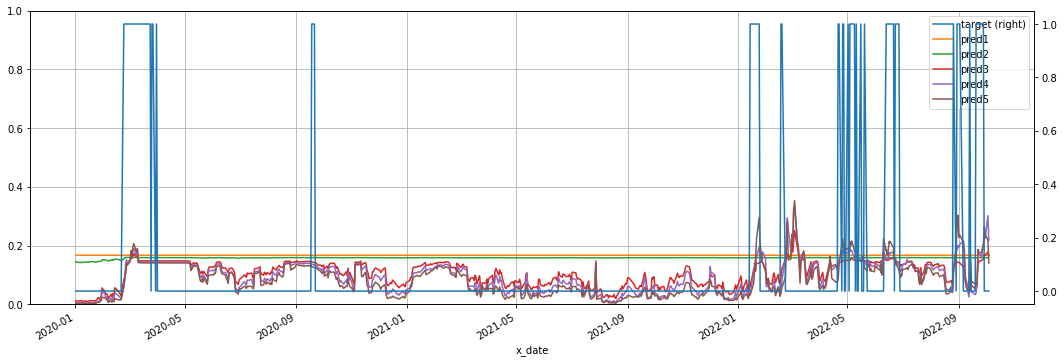

In [14]:
df_pred.plot(figsize=(18, 6), secondary_y=['target'], grid=True, ylim=(0,1))

In [15]:
df_pred['pred_mean'] = df_pred[pred_cols].apply(lambda x: weighted_average(x), axis=1)
#df_pred['pred_mean_label']=((df_pred[pred_cols]>0.5).mean(axis=1)>0.5).astype(int)
df_pred['pred_mean_label']=(df_pred['pred_mean']>0.5).astype(int)

<AxesSubplot:xlabel='x_date'>

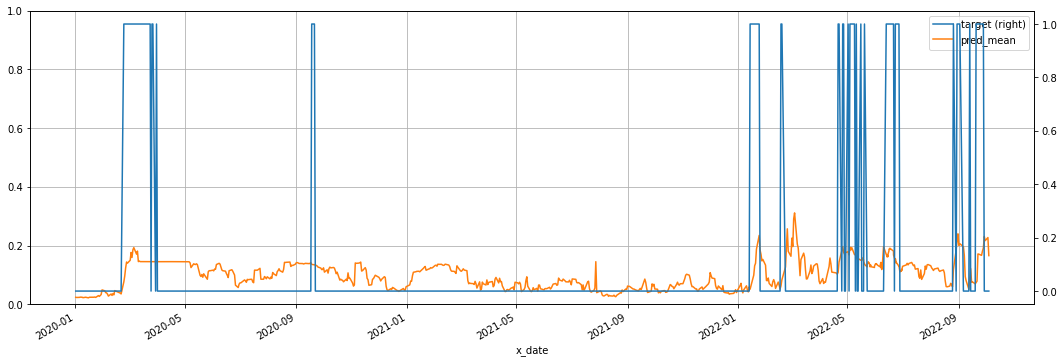

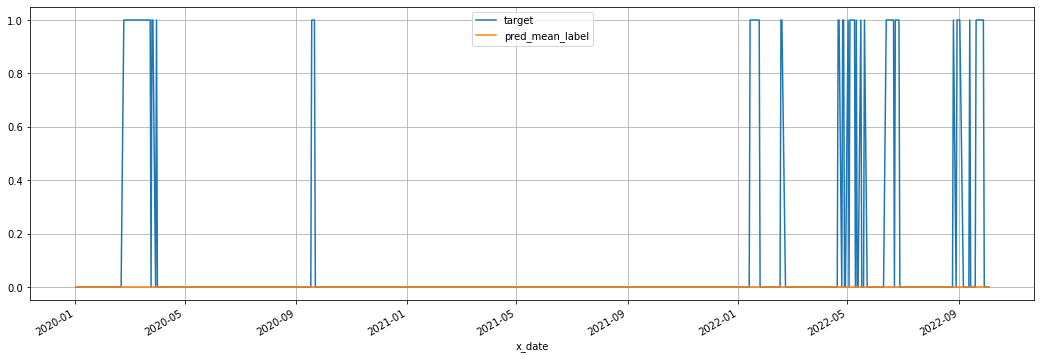

In [16]:
df_pred[['target', 'pred_mean',]].plot(figsize=(18, 6), secondary_y=['target'], grid=True, ylim=(0,1))
df_pred[['target', 'pred_mean_label']].plot(figsize=(18, 6),  grid=True)

In [17]:
for c in pred_cols + ['pred_mean']:
    auc_score = roc_auc_score(df_pred['target'], df_pred[c])
    print(c, f'{auc_score:.3f}')

pred1 0.857
pred2 0.852
pred3 0.831
pred4 0.859
pred5 0.871
pred_mean 0.866


In [18]:
prob_cut = 0.5
tp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==1) ).sum() #true positive 
fp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==0) ).sum() #false positive
fn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==1) ).sum() #false negative
tn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==0) ).sum() #true negative

cm = pd.DataFrame(data=[[tp, fp, ], [fn, tn,]], 
                  index=['Predict: Crisis', 'Predict: Normal'], 
                  columns=['Actual: Crisis', 'Actual: Normal', ],
                 )
precision = tp/(tp+fp) 
recall = tp/(tp + fn)
#cm

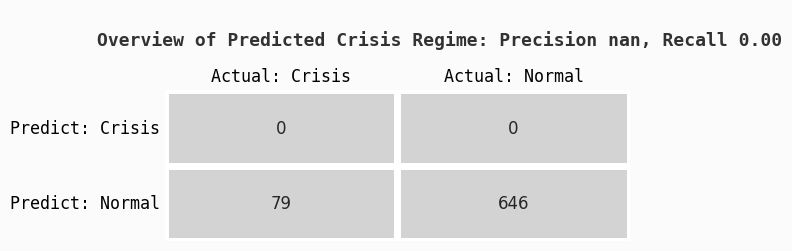

In [19]:
colors = ["lightgray", "lightgray","lightgray",]


background_color = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(6,2),  dpi=100,facecolor=background_color)


sns.heatmap(cm, cmap=colors,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax,
            yticklabels=cm.index,vmax=500,vmin=0,
            xticklabels=cm.columns,annot_kws={"fontsize":12})
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_facecolor(background_color) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
#ax.tick_params(axis=u'both', which=u'both',length=0, )
ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.text(.012, 1., f'''
Overview of Predicted Crisis Regime: Precision {precision:.2f}, Recall {recall:.2f}
''', fontfamily='monospace',fontweight='bold',fontsize=13,color='#323232', ha='left')


plt.show()

<a id="2.2"></a>

## <left>2.2 Create Sliding window - fixed length of training data</left>

[back to top](#toc)

### Create data folds


In [20]:
kfold_list = []

for yr in [2020, 2022]:
    train_loc = (train_df.index<f'{yr-1}-12-01') & (train_df.index>=f'{yr-15}-12-01') 
    test_loc = (df.index>=f'{yr}-01-01') & (df.index<f'{yr+2}-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       df.loc[test_loc, final_feats], df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (3523, 127) (3523,) (505, 127) (505, 1) 2005-12-01 00:00:00 2019-11-29 00:00:00 2020-01-02 00:00:00 2021-12-31 00:00:00
2 (3020, 127) (3020,) (220, 127) (220, 1) 2007-12-03 00:00:00 2019-11-29 00:00:00 2022-01-03 00:00:00 2022-10-04 00:00:00


### Predict testing data

In [21]:
preds_list = []
pred_cols = []
for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
    st_scaler = StandardScaler()
    x_train_ = st_scaler.fit_transform(X_train)
    x_test_ = st_scaler.transform(X_test)

    svc = SVC(probability=True)
    svc.fit(x_train_, y_train)
    y_preds = svc.predict_proba(x_test_)[:,1]
   
    df_pred = y_test.copy(deep=True)
    df_pred[f'pred'] = y_preds
    pred_cols.append(f'pred{j+1}')
    preds_list.append(df_pred)

In [22]:
df_pred = pd.concat(preds_list, axis=0)
df_pred.head(2)

,target,pred
x_date,,
2020-01-02,0.00,0.01
2020-01-03,0.00,0.01



### Model performance

<AxesSubplot:xlabel='x_date'>

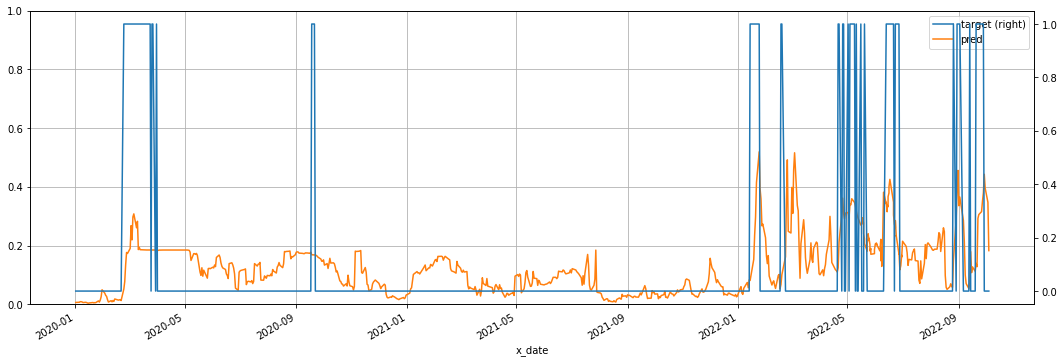

In [23]:
df_pred.plot(figsize=(18, 6), secondary_y=['target'], grid=True, ylim=(0,1))

In [24]:
for c in  ['pred']:
    auc_score = roc_auc_score(df_pred['target'], df_pred[c])
    print(c, f'{auc_score:.3f}')

pred 0.871


In [25]:
prob_cut = 0.5
tp = ((df_pred['pred']>prob_cut) & (df_pred['target']==1) ).sum() #true positive 
fp = ((df_pred['pred']>prob_cut) & (df_pred['target']==0) ).sum() #false positive
fn = ((df_pred['pred']<=prob_cut) & (df_pred['target']==1) ).sum() #false negative
tn = ((df_pred['pred']<=prob_cut) & (df_pred['target']==0) ).sum() #true negative

cm = pd.DataFrame(data=[[tp, fp, ], [fn, tn,]], 
                  index=['Predict: Crisis', 'Predict: Normal'], 
                  columns=['Actual: Crisis', 'Actual: Normal', ],
                 )
precision = tp/(tp+fp) 
recall = tp/(tp + fn)
#cm

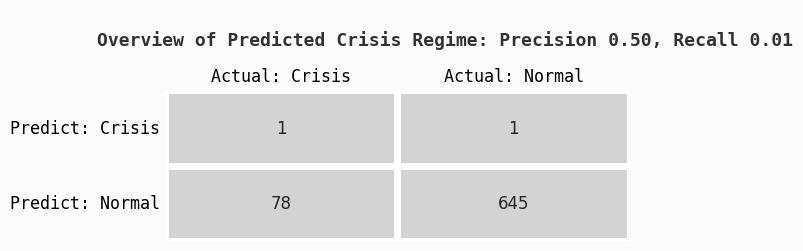

In [26]:
colors = ["lightgray", "lightgray","lightgray",]


background_color = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(6,2),  dpi=100,facecolor=background_color)


sns.heatmap(cm, cmap=colors,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax,
            yticklabels=cm.index,vmax=500,vmin=0,
            xticklabels=cm.columns,annot_kws={"fontsize":12})
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_facecolor(background_color) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
#ax.tick_params(axis=u'both', which=u'both',length=0, )
ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.text(.012, 1., f'''
Overview of Predicted Crisis Regime: Precision {precision:.2f}, Recall {recall:.2f}
''', fontfamily='monospace',fontweight='bold',fontsize=13,color='#323232', ha='left')


plt.show()

<a id="3"></a>

# <left>3. Neural Networks - MLP (Multilayer perceptron) </left>

[back to top](#toc)


<a id="4"></a>

# <left>4. Neural Networks - 1D-CNN</left>

[back to top](#toc)